In [1]:
import pandas as pd
import numpy as np
import re
import json
import datetime
import os
import matplotlib.pyplot as plt

In [2]:
from food import *
import food
import importlib
importlib.reload(food)

<module 'food' from '/mnt/c/Users/Giacomo/Dropbox/FoodProject/food.py'>

In [3]:
database_path = "/mnt/c/Users/Giacomo/Dropbox/FoodProject/food_database.csv"
diary_path = "/mnt/c/Users/Giacomo/Dropbox/FoodProject/diary_food/"

In [4]:
df_food = food.load_food_database(file_path=database_path)

In [5]:
# find_food(df_food, 'cheese')

In [6]:
recipe = """
48 g oat
110 g banana
1.5 tbs almond_butter
"""
food.recipe_details(recipe, df_food)

oat
banana
almond_butter


Calories          429.214689
Total_fats         17.072881
Saturated_fats      1.751554
Cholesterol              0.0
Sodium              0.932203
Total_carbs        62.736158
Dietary_fibers     10.473164
Sugars             13.800847
Proteins           12.861864
dtype: object

In [17]:
recipe = """
2 unit brioche_bun
227 g beef_ground_96_4
2 tbs sauce_aioli
50 g shallot
70 g tomato
2 slice cheese_swiss_skim
"""
food.recipe_details(recipe, df_food)

brioche_bun
beef_ground_96_4
sauce_aioli
shallot
tomato
cheese_swiss_skim


Calories           770.974767
Total_fats          19.085398
Saturated_fats      10.017699
Cholesterol        180.530973
Sodium            1006.034681
Total_carbs         74.864865
Dietary_fibers       2.072973
Sugars              19.418919
Proteins            67.908814
dtype: object

In [8]:
#food.sum_up_day(df_nutrients, category=None)

flour_whole
banana
egg
cherry
wrap_spicy_lentil
pastrami
protein_bar_chocolate
brioche_bun
beef_ground_96_4
sauce_aioli
shallot
tomato
cheese_swiss_skim
Breakfast: flour_whole, banana, egg, cherry
Lunch: wrap_spicy_lentil, pastrami
Snack: protein_bar_chocolate
Dinner: brioche_bun, beef_ground_96_4, sauce_aioli, shallot, tomato, cheese_swiss_skim
Night: 


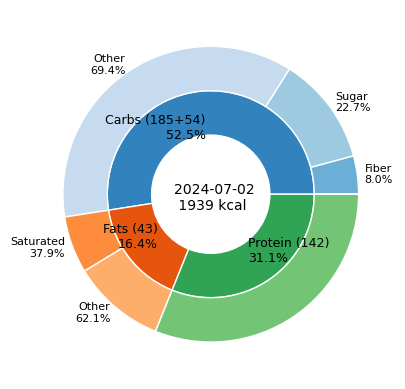

In [18]:
fig, ax = plt.subplots(1,1)
food.plot_pie_given_day(database_path, f"{diary_path}2024-07-02.txt", ax=ax)

oat
blueberry
ricotta_skim
walnut
burrito_feta
banana
greek_yogurt_zero
mango_frozen
anchovies_cento
broccoli
pasta_handmade
oil_olive
octopus_costco
Breakfast: oat, blueberry, ricotta_skim, walnut
Lunch: burrito_feta, banana
Snack: greek_yogurt_zero, mango_frozen
Dinner: anchovies_cento, broccoli, pasta_handmade, oil_olive, octopus_costco
Night: 
oat
blueberry
banana
almond_butter
bagel_sesame
salmon_smoked
egg
tomato
onion_red
cream_cheese
greek_yogurt_zero
mango_frozen
egg_hard_boiled
broccoli
beef_flank
pasta_handmade
banana
Breakfast: oat, blueberry, banana, almond_butter
Lunch: bagel_sesame, salmon_smoked, egg, tomato, onion_red, cream_cheese
Snack: greek_yogurt_zero, mango_frozen, egg_hard_boiled
Dinner: broccoli, beef_flank, pasta_handmade
Night: banana
salmon_smoked
rice_cake_brown
paella_frozen
seafood_frozen
protein_bar_cookie
turkey_ground_99_1
pasta_whole
tomato
pepper_red
onion_yellow
protein_powder_ascent_chocolate
greek_yogurt_zero
Breakfast: salmon_smoked, rice_cake_br

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/Giacomo/Dropbox/FoodProject/diary_food/2024-06-09.txt'

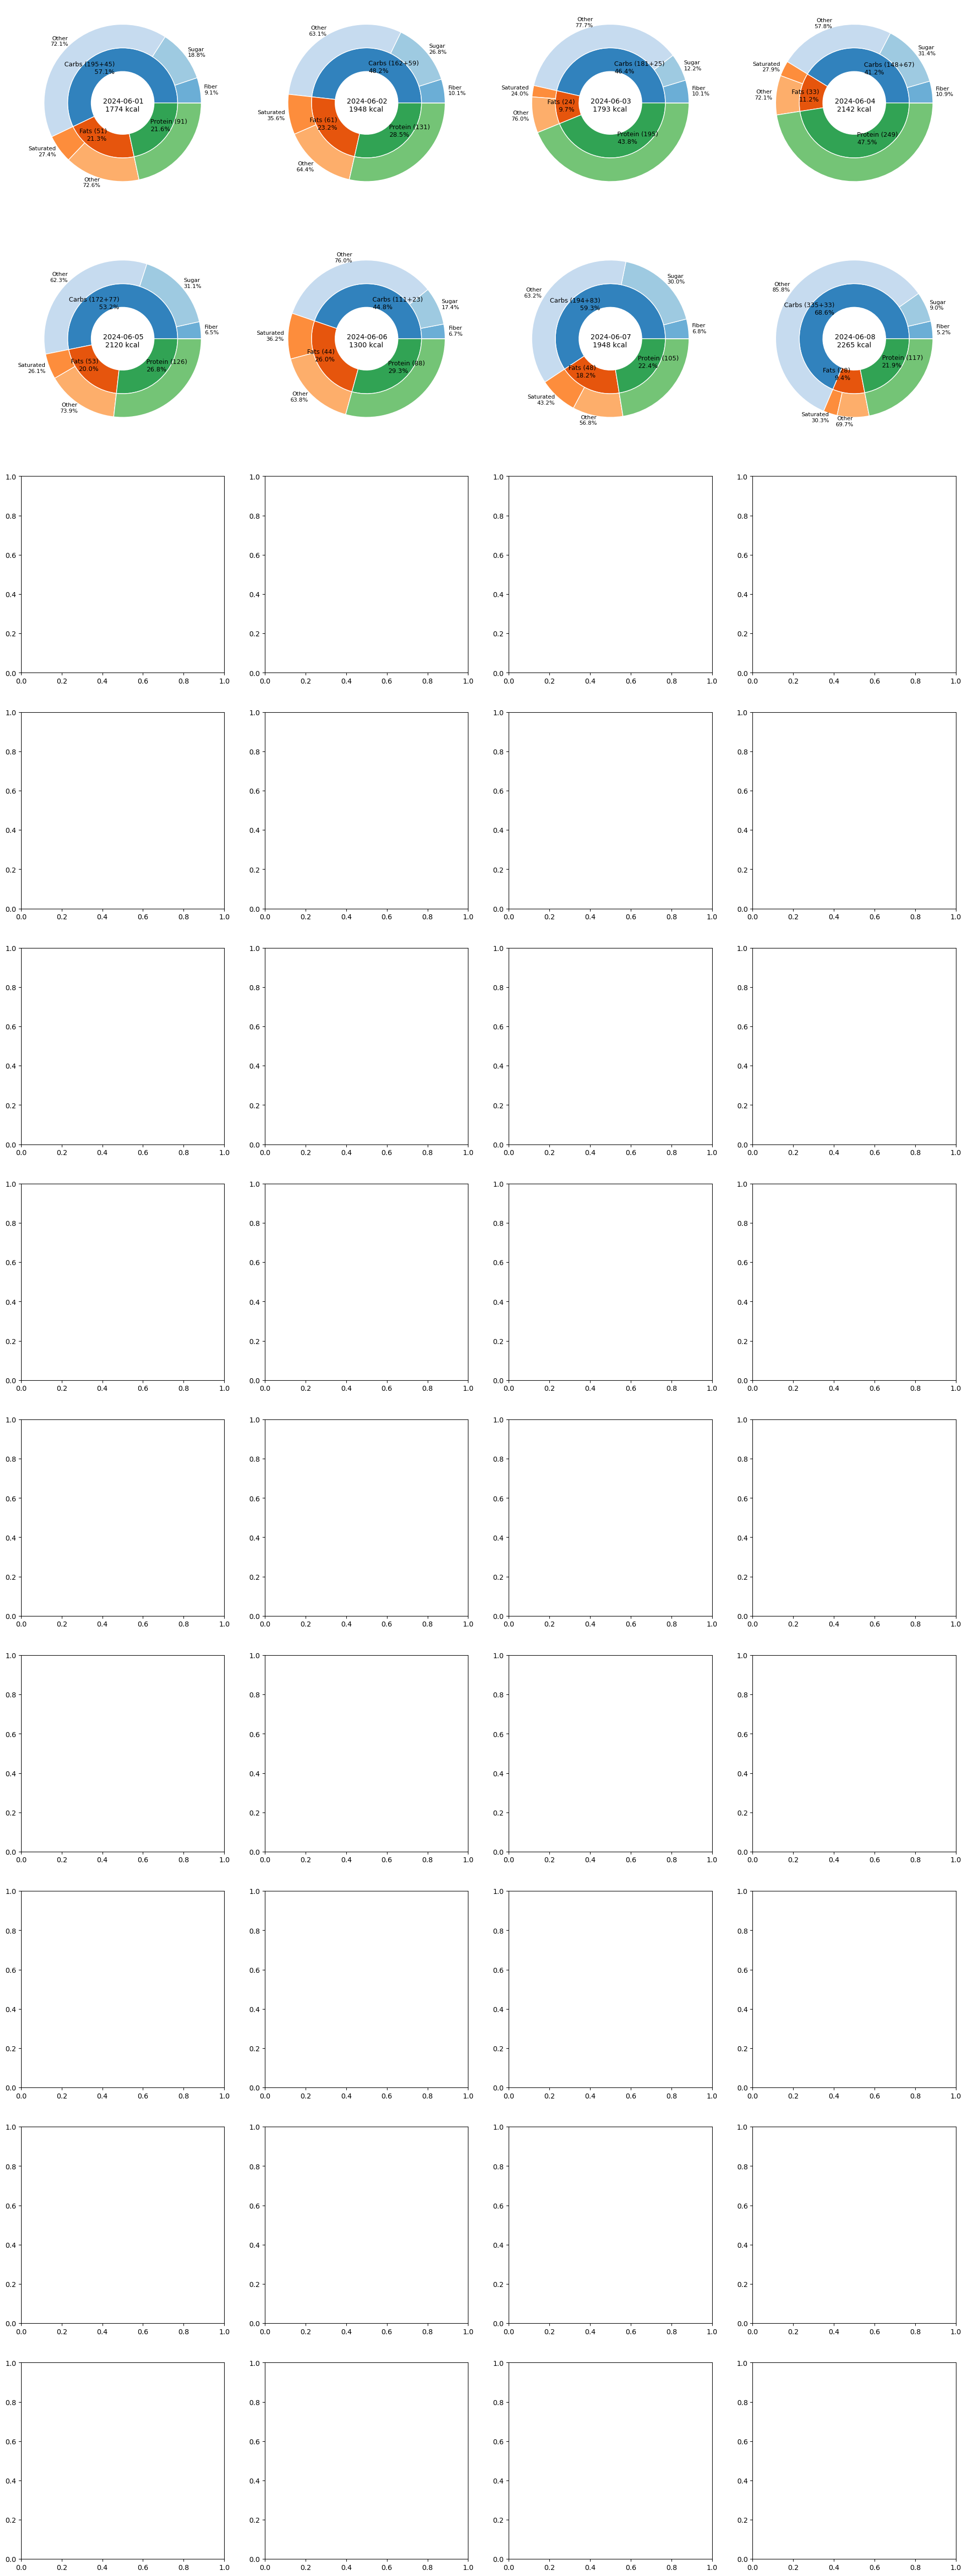

In [21]:
dates = food.generate_dates(start='2024-06-01', end='2024-06-30', year=None, month=None)
N = len(dates)

cols = 4
rows = N // 3
if N % cols > 0: 
    rows += 1

fig, axs = plt.subplots(rows, cols, figsize=(6*cols, 6*rows))
for i in range(rows):
    for j in range(cols):
        idx = cols * i + j
        if idx >= N: 
            axs[i,j].set_axis_off()
        else:
            date = dates[idx]
            diary_entry_path = f"{diary_path}{date}.txt"
            if N <= cols:
                food.plot_pie_given_day(database_path, diary_entry_path, axs[j])
            else: 
                food.plot_pie_given_day(database_path, diary_entry_path, axs[i,j])
    